In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import plotly.express as px  

from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import MinMaxScaler  
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering  
import scipy.cluster.hierarchy as shc  
from sklearn.decomposition import PCA  
from sklearn.manifold import TSNE  

from sklearn.metrics import silhouette_score, calinski_harabasz_score, accuracy_score, rand_score  

import warnings  
warnings.filterwarnings('ignore')  

scaler = StandardScaler()  

In [2]:
df = pd.read_csv('pokemon.csv')
X = df.iloc[:, 1:]
y = df.iloc[:, 0]


In [3]:
df.head(10)

,Name,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed
0,Bulbasaur,318,45,49,49,65,65,45
1,Ivysaur,405,60,62,63,80,80,60
2,Venusaur,525,80,82,83,100,100,80
3,Mega Venusaur,625,80,100,123,122,120,80
4,Charmander,309,39,52,43,60,50,65
5,Charmeleon,405,58,64,58,80,65,80
6,Charizard,534,78,84,78,109,85,100
7,Mega Charizard,634,78,130,111,130,85,100
8,Mega Charizard X,634,78,104,78,159,115,100
9,Squirtle,314,44,48,65,50,64,43


## Описание полей набора данных

Name -  имя персонажа

Total - итоговое количество очков

HP - количество очков жизни 

Attack	 - количество очков ататки 

Defence - количество очков защиты 

Sp_attack	 - размер

Sp_defence - кол-во оценок 

Speed - скорость персонажа

In [6]:
df.shape

(1045, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        1045 non-null   object
 1   Total       1045 non-null   int64 
 2   HP          1045 non-null   int64 
 3   Attack      1045 non-null   int64 
 4   Defence     1045 non-null   int64 
 5   Sp_attack   1045 non-null   int64 
 6   Sp_defence  1045 non-null   int64 
 7   Speed       1045 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 65.4+ KB


В датасете нет пустых значений.

Признаки имеют следующие типы данных: Name является категориальным, остальные являются количественными


In [9]:
df.describe()

,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,439.314833,70.067943,80.466986,74.661244,73.022010,72.288995,68.807656
std,121.970701,26.671411,32.413665,31.237903,32.724797,28.074148,30.210094
min,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000
50%,458.000000,68.000000,77.000000,70.000000,65.000000,70.000000,65.000000
75%,515.000000,82.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


Анализируя данную таблицу видно, что аномальных значений не присутсвует.

Total: Среднее — 439, минимум — 175, максимум — 1125, стандартное отклонение — 122.

HP: Среднее — 70, минимум — 1, максимум — 255, стандартное отклонение — 27.

Attack: Среднее — 80, минимум — 5, максимум — 190, стандартное отклонение — 32.

Defence: Среднее — 74, минимум — 5, максимум — 250, стандартное отклонение — 31.

Sp_attack: Среднее — 73, минимум — 10, максимум — 194, стандартное отклонение — 33.

Sp_defence: Среднее — 72, минимум — 20, максимум — 250, стандартное отклонение — 28.

Speed: Среднее — 69, минимум — 5, максимум — 200, стандартное отклонение — 30.

In [11]:
df.describe(include=object)

,Name
count,1045
unique,1035
top,Mega Rotom X
freq,4


Самое популярное имя персонажа это Mega Rotom X.
 Всего 1035 уникальных персонажей.

In [13]:
selected_columns = df[['Total', 'HP', 'Attack','Defence', 'Sp_attack', 'Sp_defence', 'Speed']]  
correlation_matrix = selected_columns.corr()
correlation_matrix

,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed
Total,1.000000,0.650805,0.733256,0.629798,0.732996,0.720227,0.561562
HP,0.650805,1.000000,0.444125,0.300300,0.371534,0.393311,0.189705
Attack,0.733256,0.444125,1.000000,0.457671,0.368751,0.267633,0.374018
Defence,0.629798,0.300300,0.457671,1.000000,0.223481,0.544191,0.004756
Sp_attack,0.732996,0.371534,0.368751,0.223481,1.000000,0.511980,0.445640
Sp_defence,0.720227,0.393311,0.267633,0.544191,0.511980,1.000000,0.226861
Speed,0.561562,0.189705,0.374018,0.004756,0.445640,0.226861,1.000000


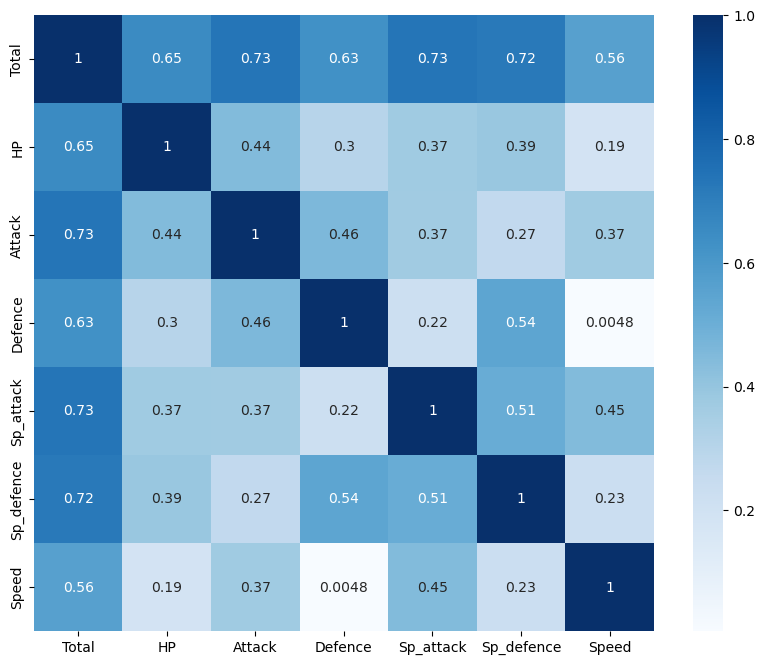

In [14]:
plt.figure(figsize=(10, 8))   
 
sns.heatmap(correlation_matrix, annot=True, cmap='Blues') 
plt.show()

Корреляционный анализ показывает, что общий показатель (Total) имеет сильную связь почти со всеми признаками.

Speed имеет низкую корреляцию  с большинством признаков, из этого мы можем сделать вывод,
что скорость персонажа не так сильно связана с их атакующими или защитными умениями.

## Распределение данных

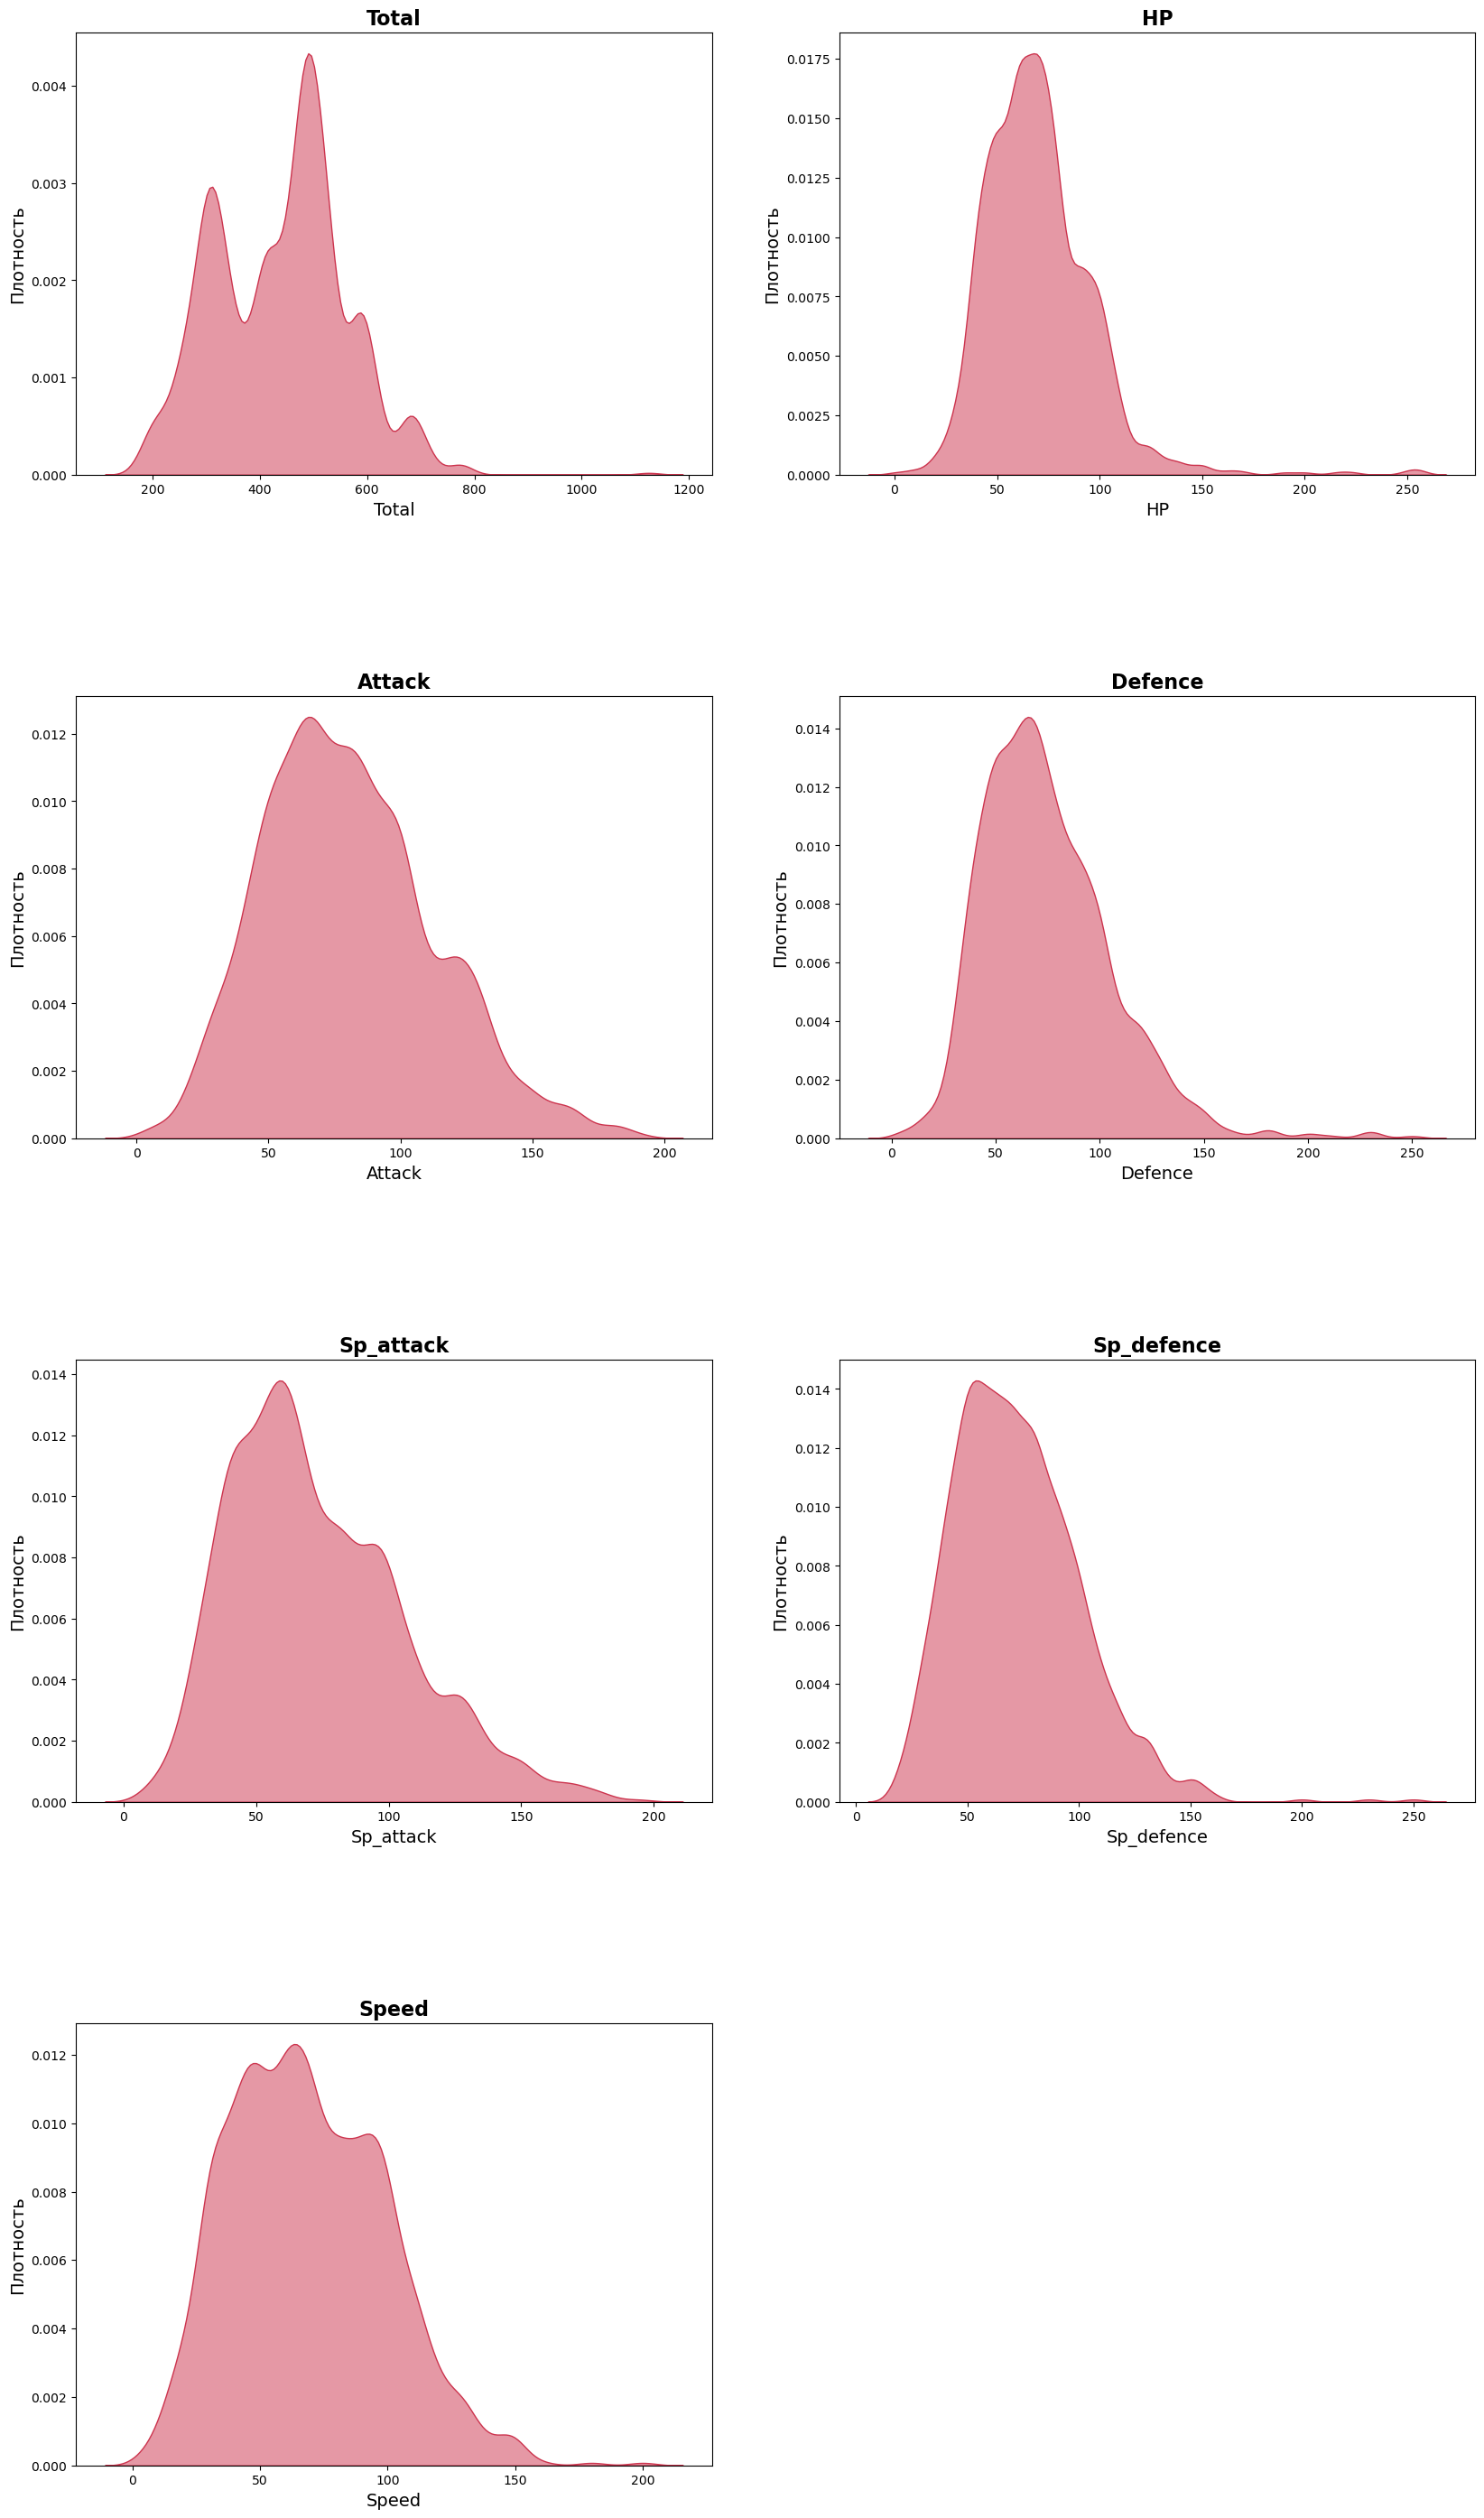

In [17]:

# Создаем матрицу графиков для визуализации распределения только по числовым переменным  
num_cols = df.select_dtypes(include=['number']).columns  # Выбираем только числовые столбцы  

fig, axes = plt.subplots(len(num_cols)//2 + len(num_cols) % 2, 2, figsize=(20, 35))  

# Расстояние между графиками  
plt.subplots_adjust(hspace=0.5)  

# Строим распределения (kdeplot) для каждого числового признака  
for i, column in enumerate(num_cols):  
    ax = axes[i // 2, i % 2]  # Определяем позицию графика  
    sns.kdeplot(data=df, x=column,  
                fill=True,  
                alpha=0.5,  
                bw_adjust=.7,  
                color=[0.8, 0.2, 0.3],  
                ax=ax)  
    
    ax.set_title(column, fontweight='bold', fontsize=16)  
    ax.set_xlabel(column, fontsize=14)  
    ax.set_ylabel('Плотность', fontsize=14)  

# Убираем лишние оси, если количество числе столбцов нечетное  
if len(num_cols) % 2 == 1:  
    axes[-1, 1].axis('off')  

plt.show()

большинство значений сосредоточено в области низких и средних значений, а очень высокие значения встречаются реже. 

Column: Total
ShapiroResult(statistic=0.9775237441062927, pvalue=1.215166162138459e-11)
NormaltestResult(statistic=12.362612194644612, pvalue=0.0020677254395560078)


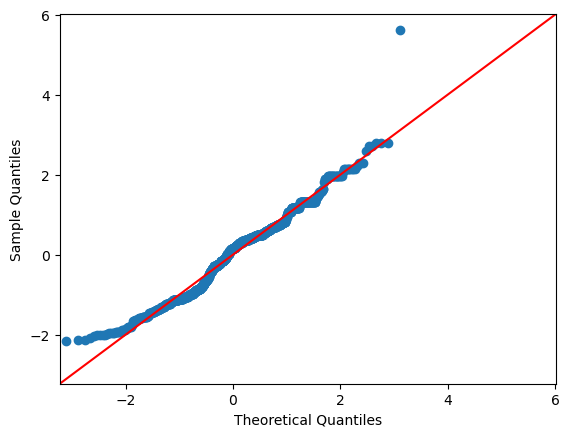

Column: HP
ShapiroResult(statistic=0.8934841752052307, pvalue=2.9068858756005505e-26)
NormaltestResult(statistic=456.50595579000947, pvalue=7.430041204443697e-100)


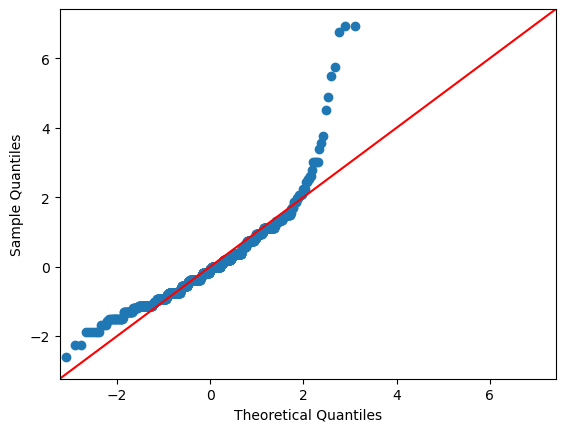

Column: Attack
ShapiroResult(statistic=0.9823992252349854, pvalue=6.359789361809476e-10)
NormaltestResult(statistic=37.63949816523822, pvalue=6.7094484831030226e-09)


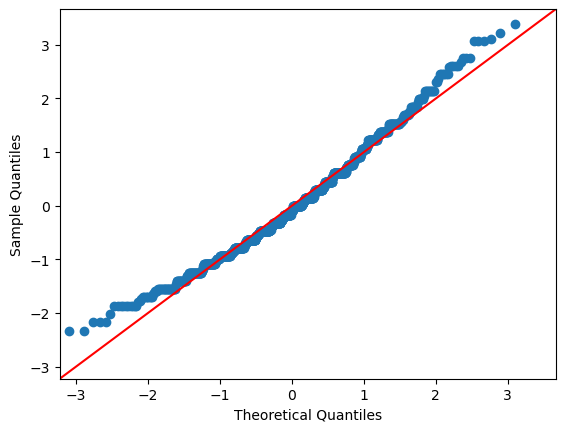

Column: Defence
ShapiroResult(statistic=0.9377061128616333, pvalue=1.684569150218153e-20)
NormaltestResult(statistic=236.94748578607627, pvalue=3.527826442572326e-52)


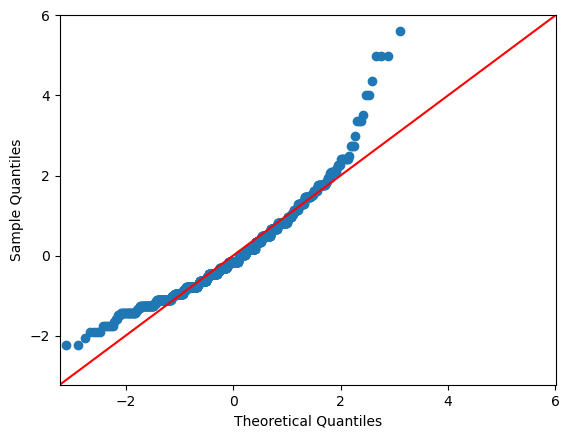

Column: Sp_attack
ShapiroResult(statistic=0.960783839225769, pvalue=3.86409707213393e-16)
NormaltestResult(statistic=77.12983771229362, pvalue=1.7843027537064664e-17)


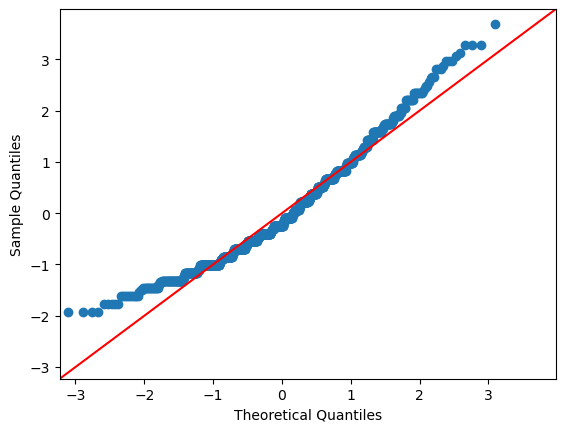

Column: Sp_defence
ShapiroResult(statistic=0.9558799266815186, pvalue=3.391899762143503e-17)
NormaltestResult(statistic=176.1190099660427, pvalue=5.704832620222174e-39)


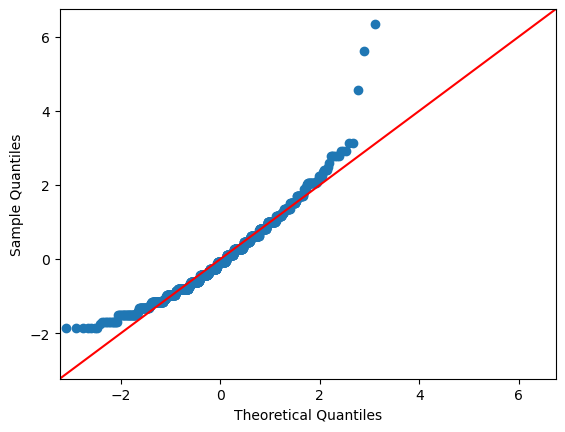

Column: Speed
ShapiroResult(statistic=0.9817636609077454, pvalue=3.6624267507612274e-10)
NormaltestResult(statistic=30.513304171020433, pvalue=2.366574534289861e-07)


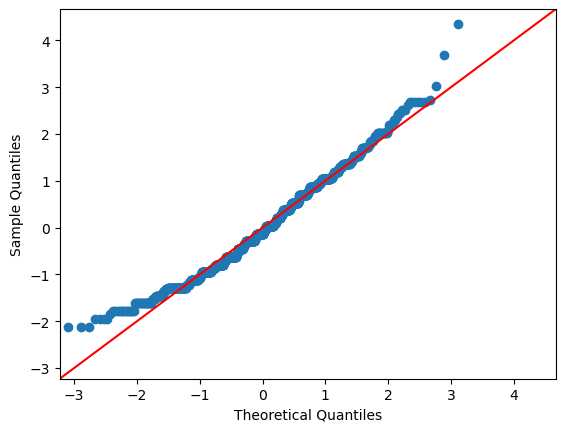

In [18]:
# Импортируем библиотеки для подсчёта метрик и построения графика qqplot
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

#Пройёмся по списку признаков
for i in ['Total', 'HP', 'Attack', 'Defence', 'Sp_attack', 'Sp_defence', 'Speed']:

    #Выведем название признака и результаты нестов на нормальность распределения
    print(f"Column: {i}")
    print(stats.shapiro(df[i]))
    print(stats.normaltest(df[i]))

    #Построим qqplot и добавим линию нормального распределения
    qqplot(df[i], fit=True, line="45")
    plt.show()


In [19]:
columns = df.select_dtypes(include=['number']).columns
df[columns] = scaler.fit_transform(df[columns])
df.head()

,Name,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed
0,Bulbasaur,-0.995099,-0.940331,-0.971259,-0.821871,-0.245253,-0.259758,-0.788447
1,Ivysaur,-0.281471,-0.377661,-0.570001,-0.373483,0.213335,0.274797,-0.291686
2,Venusaur,0.702843,0.372564,0.047318,0.267071,0.824785,0.987537,0.370661
3,Mega Venusaur,1.523104,0.372564,0.602905,1.548180,1.497380,1.700278,0.370661
4,Charmander,-1.068923,-1.165398,-0.878661,-1.014037,-0.398115,-0.794313,-0.126100


# Метод главных компонентов

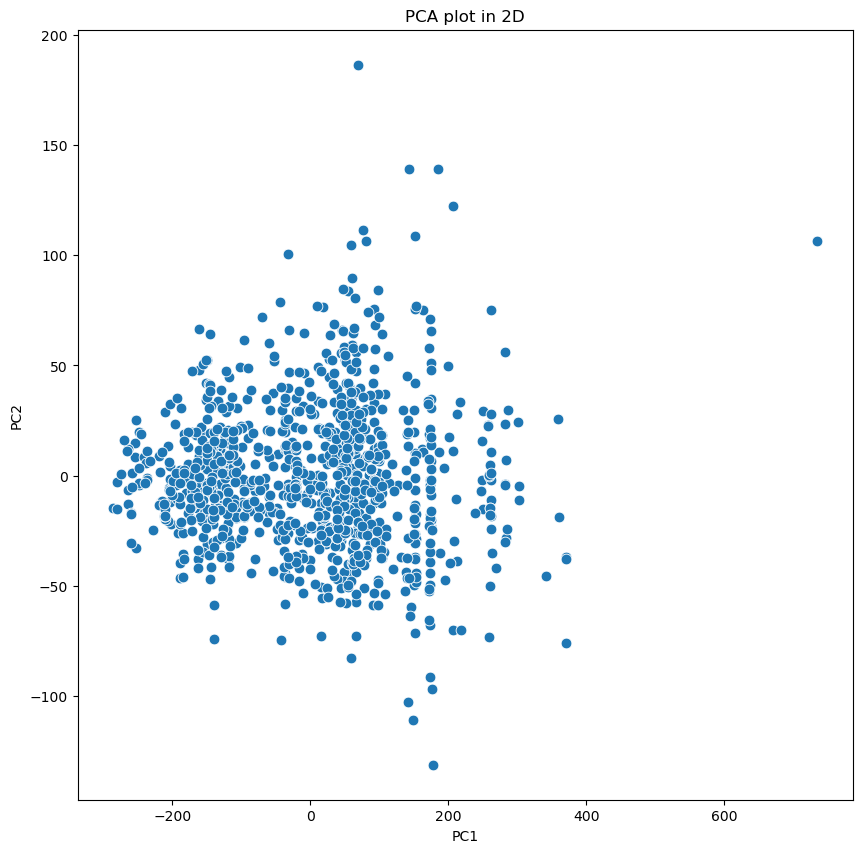

In [21]:
principal_df = pd.DataFrame(data = PCA(n_components=2).fit_transform(X))
    
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                s=60)

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

Большинство точек сосредоточены в центральной области, что говорит о высокой плотности данных и наличии общего распределения.

Есть отдельные точки, сильно удалённые от основной массы, что могут быть выбросами или особым классом данных.
    
Распределение демонстрирует, что большинство данных не разделяются явно

In [22]:
def TSNEplot(pred=None):    
    tsne = TSNE(random_state=1)

    X_tsne = tsne.fit_transform(X)

    plt.figure(figsize=(12, 10))
    plt.scatter(X_tsne[:, 0], 
                X_tsne[:, 1], 
                c = pred, 
                edgecolor="none", 
                alpha=0.7, s=40,
        cmap=plt.cm.get_cmap("flare", 3))

    plt.colorbar()
    plt.title("t-SNE projection");

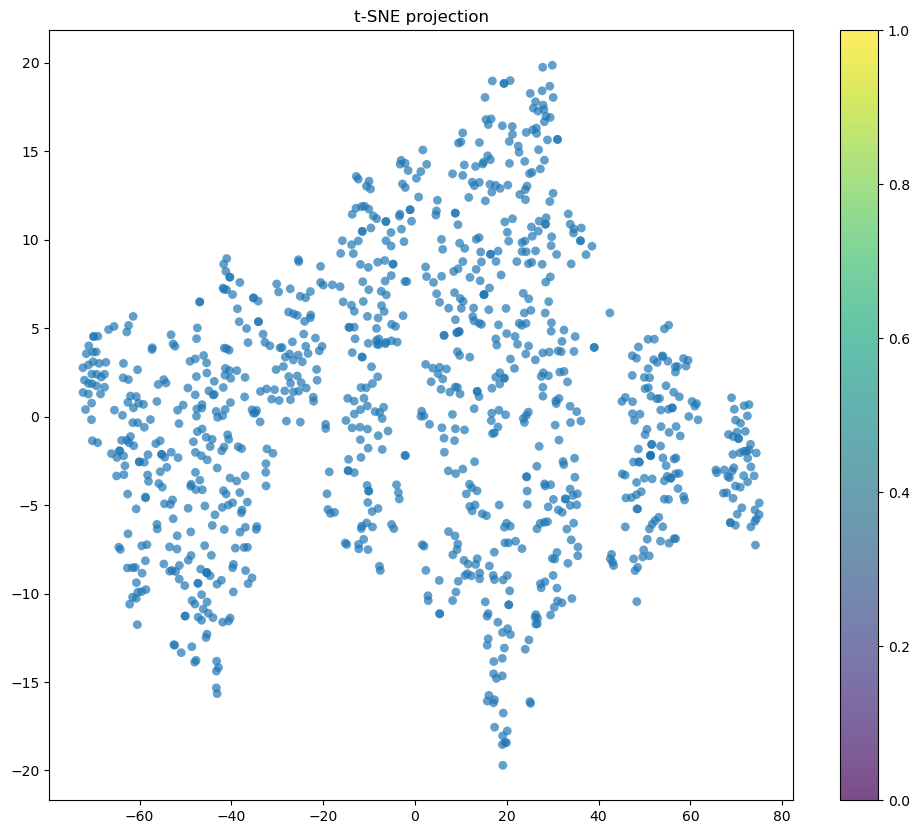

In [23]:
TSNEplot()

# Моделирование

# K-Means

In [26]:
pca = PCA(n_components=2)


kmeans = KMeans(n_clusters=3, random_state=1, n_init='auto').fit(X)
centroids_pca = pca.fit_transform(kmeans.cluster_centers_)
pred_k = kmeans.labels_

principal_df = pd.DataFrame(data = PCA(n_components=2).fit_transform(X))

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1, n_init='auto').fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
    
plt.plot(range(1, 8), inertia, marker="s")
plt.xlabel("$k$")
plt.ylabel("$J(C_k)$");

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # Преобразуем данные в 2D

# Кластеризация на уменьшенных данных
kmeans = KMeans(n_clusters=3, random_state=1, n_init='auto').fit(X_pca)
centroids_pca = kmeans.cluster_centers_  # Центроиды уже в пространстве PCA
pred_k = kmeans.labels_

# Создаем DataFrame для визуализации
principal_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Визуализация
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x=principal_df['PC1'], 
                y=principal_df['PC2'], 
                hue=pred_k, 
                palette="flare", 
                s=60)
sns.scatterplot(x=centroids_pca[:, 0], 
                y=centroids_pca[:, 1],  
                marker="x", 
                s=450, 
                color='blue')
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
TSNEplot(pred_k)

# AgglomerativeClustering

In [ ]:
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot
pyplot.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
clustering_ward = AgglomerativeClustering(3).fit(X)
pred_ward = clustering_ward.labels_

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = pred_ward, 
                palette="flare", 
                s=60)
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

In [ ]:
TSNEplot(pred_ward)

# Spectral Clustering

In [ ]:
clustering_sp = SpectralClustering(3).fit(X)
pred_sp = clustering_sp.labels_

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = pred_sp, 
                palette="flare", 
                s=60)
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

In [ ]:
TSNEplot(pred_sp)

# Сравнение реальных и предсказанных кластеров

In [ ]:
rs_k = rand_score(kmeans.labels_, y) 
rs_ward = rand_score(pred_ward, y)
rs_sp = rand_score(pred_sp, y)

print('\nK-Means')
print('_'*45 + '\n')
print(" rand_score = {} \n\n {} из 178 предсказано верно \n\n\n\n".format(rs_k, rs_k * 178))


print('Agglomerative Clustering')
print('_'*45 + '\n')
print(" rand_score = {} \n\n {} из 178 предсказано верно \n\n\n\n".format(rs_ward, rs_ward * 178))


print('Spectral Clustering')
print('_'*45 + '\n')
print(" rand_score = {} \n\n {} из 178 предсказано верно \n".format(rs_sp, rs_sp * 178))

# ACCURACY_SCORE

In [ ]:
y = y*10

In [ ]:
def ACCURACY_SCORE(pred, R, v):
    
    diff = y - pred
    bb_data = pd.DataFrame(pred.copy())
    diff = diff.apply(lambda x: 1 if (x in [v[0] - R[0], v[1] - R[1], v[2] - R[2]]) else 0)
    
    
    bb_data.replace(to_replace=R[0], value=v[0], inplace=True)
    bb_data.replace(to_replace=R[1], value=v[1], inplace=True)
    bb_data.replace(to_replace=R[2], value=v[2], inplace=True)

    
    acc_k = accuracy_score(bb_data, y) 
    print(" accuracy_score = {} \n\n {} значений из 178 предсказано верно \n\n\n\n".format(acc_k, acc_k * 178))
    
    
    principal_df = pd.DataFrame(data = PCA(n_components=2).fit_transform(X))
    components = PCA(n_components=3).fit_transform(X)

    
    fig = plt.figure(figsize=(10, 10))
    sns.scatterplot(x = principal_df.iloc[:,0], y = principal_df.iloc[:,1], hue = diff, palette=['#FF0000', '#1E90FF' ], s=90)
    plt.title('PCA график ошибок 2D')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    
    
    fig11 = px.scatter_3d(
    components, x=0, y=1, z=2, color=diff, size=0.1*np.ones(len(X)), opacity = 1,
    title='PCA график ошибок 3D',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=900, height=900)
    fig11.show()

## K-Means

In [ ]:

# Step 1: Fit PCA  
pca = PCA(n_components=2)  
principal_components = pca.fit_transform(X)  

# Step 2: Create DataFrame  
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])  

# Step 3: Plot  
fig = plt.figure(figsize=(10, 10))  

# Scatter plot for original labels  
sns.scatterplot(x=principal_df['PC1'],   
                y=principal_df['PC2'],   
                hue=y,  
                palette="viridis",   
                s=70,   
                alpha=0.6,   
                edgecolor=None)  

# Scatter plot for KMeans labels  
sns.scatterplot(x=principal_df['PC1'],   
                y=principal_df['PC2'],   
                hue=kmeans.labels_,   
                palette="magma",   
                marker=".",   
                s=50,   
                legend=False)  

# Add Titles and Labels  
plt.title('PCA Plot in 2D')  
plt.xlabel('PC1')  
plt.ylabel('PC2')  
plt.legend(loc='best')  
plt.show()  